## L06 Naive Bayes Classifier on MNIST dataset

We have chosen the use the Multinominal Naive Bayes model, as this is the one the contributes to the best accurracy in predicting the numbers after being trained by the MNIST dataset.


In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
from libitmal import dataloaders_myOwn as dl

X, y_true = dl.MNIST_GetDataSet()
print(f" X.shape={X.shape}, y_true.shape={y_true.shape}")

 X.shape=(70000, 784), y_true.shape=(70000,)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_true, train_size=60000, shuffle=True)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


Time to fit the model:
0.659235954284668
The accuracy of the Naive Bayes Gaussian model; 
0.8296
And the a heatmap of the confusion matrix:


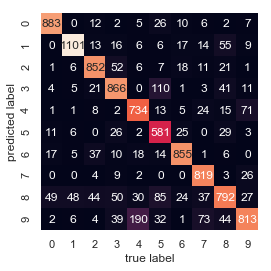

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import time as t

model = MultinomialNB()

start = t.time()
model.naiveBayes = model.fit(X=X_train, y=y_train)

# printing time to train the model.
print("Time to fit the model:")
print( t.time() - start )

pred_labels = model.predict(X = X_test )

mat = confusion_matrix(y_test, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=1, yticklabels=1)# , y_test.label, y_train.label) # just =1 ?
plt.xlabel('true label')
plt.ylabel('predicted label');

modelacc = accuracy_score(y_test, pred_labels)

print("The accuracy of the Naive Bayes Gaussian model; ")
print( modelacc )
print("And the a heatmap of the confusion matrix:")

## Conclusion
To easily see how the model performs on the dataset we decided to go with a confusuion matrix as a heatmap, to easily see where errors occurs most. And then we also computed the overall accuracy to get somthing more comparable.
The accuracy using the Multinominal Naive Bayes model was not overwhelmingly good, at 82 percent, we should be able to do much better with other models. In assignments from L03 - Metrics we saw a dummy classifier performing about 90% and SGD classifier doing 96%